In [29]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv("./dataset/1. Engineering_graduate_salary.csv")
print(data.info())
# 备份原始数据
data_backup = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [31]:
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


### Data Cleansing

In [8]:
data.duplicated().any()

np.False_

In [9]:
data.isnull().any()

ID                       False
Gender                   False
DOB                      False
10percentage             False
10board                  False
12graduation             False
12percentage             False
12board                  False
CollegeID                False
CollegeTier              False
Degree                   False
Specialization           False
collegeGPA               False
CollegeCityID            False
CollegeCityTier          False
CollegeState             False
GraduationYear           False
English                  False
Logical                  False
Quant                    False
Domain                   False
ComputerProgramming      False
ElectronicsAndSemicon    False
ComputerScience          False
MechanicalEngg           False
ElectricalEngg           False
TelecomEngg              False
CivilEngg                False
conscientiousness        False
agreeableness            False
extraversion             False
nueroticism              False
openess_

### Linear Regression

模型的R^2为: 0.02506764045383303
模型的均方误差(MSE)为: 44317947706.476616
模型的系数为: [3040.39613913]
模型的截距为: 86345.11999416593


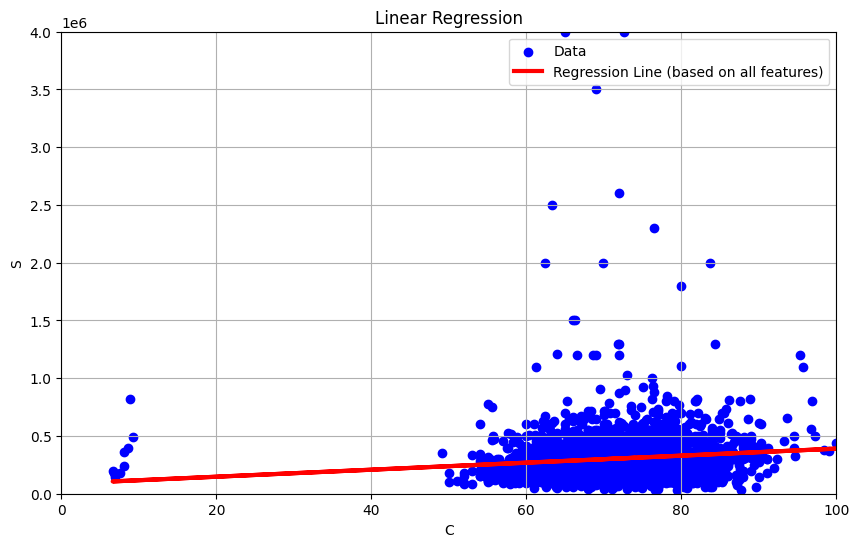

In [26]:
X = data[['collegeGPA']]
y = data['Salary']
# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立线性回归模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
# 评估模型
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"模型的R^2为: {score}")
print(f"模型的均方误差(MSE)为: {mse}")
print(f"模型的系数为: {model.coef_}")
print(f"模型的截距为: {model.intercept_}")
# 可视化：选择YearlyIncome作为X轴，并在训练集上绘制回归直线
plt.figure(figsize=(10, 6))
plt.scatter(X['collegeGPA'], y, color='blue', label='Data')

# 为了绘制回归直线，我们使用训练集中的一个子集（或全部）来预测y值
y_pred = model.predict(X)

plt.plot(X['collegeGPA'], y_pred, color='red', linewidth=3,
         label='Regression Line (based on all features)')
plt.xlim(0, 100)
plt.ylim(0, 4000000)
plt.xlabel('C')
plt.ylabel('S')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

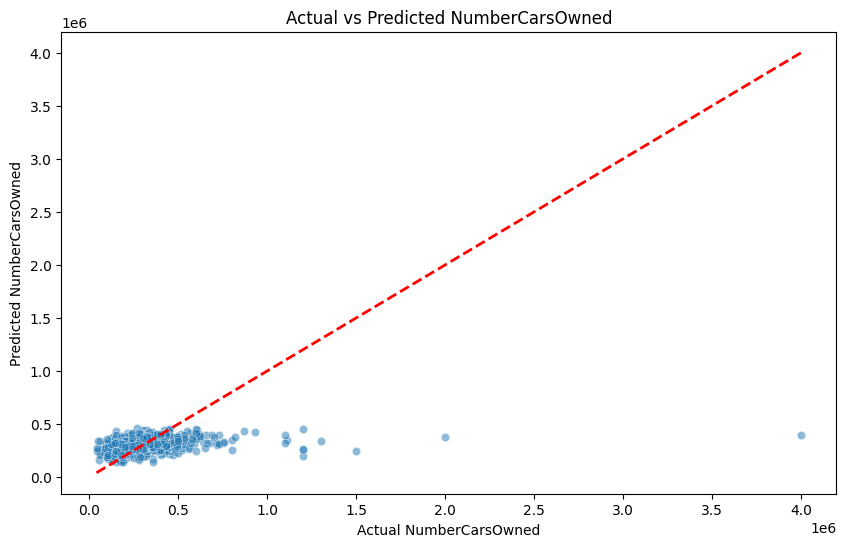

In [46]:
# 准备数据
# Prepare the data
X = data[['collegeGPA','10percentage','12percentage','English','Logical','Quant']]
y = data['Salary']

# 分割数据集
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
# Train the model
car_predict = LinearRegression()
car_predict.fit(X_train, y_train)

# 进行预测
# Make predictions
predictions = car_predict.predict(X_test)
# 可视化实际值和预测值
# Visualize actual values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, edgecolors='w', linewidth=0.5)
# Plot a line for the ideal predictions (where actual equals predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual NumberCarsOwned')
plt.ylabel('Predicted NumberCarsOwned')
plt.title('Actual vs Predicted NumberCarsOwned')
plt.show()